# Customer Churn Prediction

## Objective

The objective is to develop a machine learning model to predict customer churn based on historical customer data. You 
will follow a typical machine learning project pipeline, from data preprocessing to model deployment

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


### Data Preprocessing

In [44]:
df = pd.read_csv('customer_churn_large_dataset.csv')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [45]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [47]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

No missing data in the dataset.....

In [48]:
df = df.drop(['CustomerID','Name'], axis=1)
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [49]:
# Handle missing data (if needed)
df.dropna(inplace=True)

# Encode categorical variables (One-Hot Encoding)
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_cols = ['Gender', 'Location']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [50]:
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target variable
y = y.astype('float32')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering

In [52]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Architecture
The model architecture I am choosing is a multilayer_perceptron

In [53]:
# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [54]:
# Train the model on the training dataset
mlp_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [55]:
# Predictions on the test set
y_pred = mlp_classifier.predict(X_test)

In [56]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7981
Precision: 0.48637015781922527
Recall: 0.518348623853211
F1 Score: 0.5018504811250926


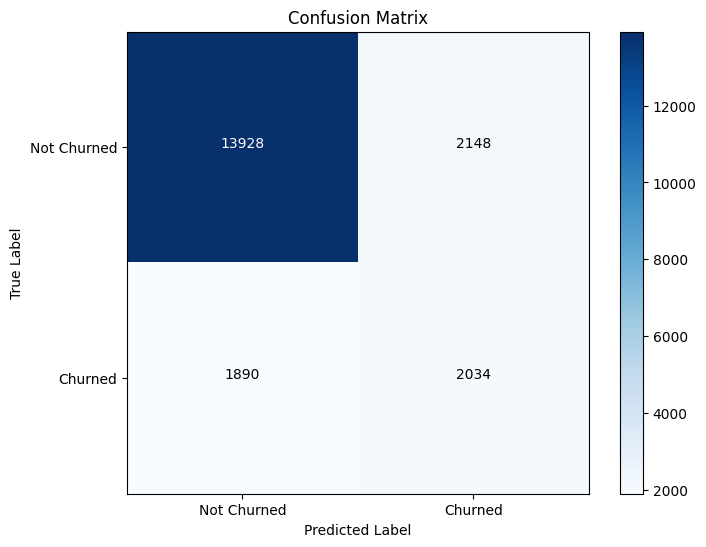

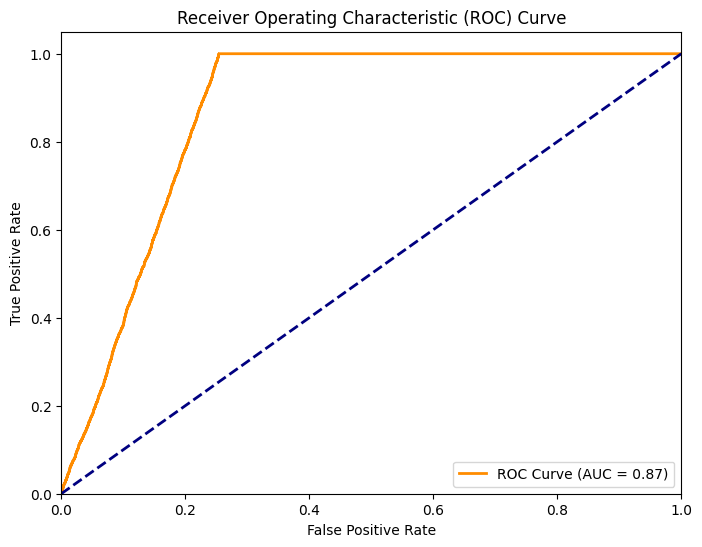

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Not Churned', 'Churned']
    tick_marks = [0, 1]
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

# Plot ROC Curve
y_scores = mlp_classifier.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_scores)


### Hyperparameter Tuning

In [65]:
param_grid = {
   'hidden_layer_sizes': [(50,), (100,)],
   'activation': ['relu'],
   'alpha': [0.001],
   'learning_rate': ['constant'],
}

In [66]:
mlp = MLPClassifier(max_iter=1000, random_state=42)


In [67]:
rf_search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=3, scoring='accuracy', cv=3, n_jobs=-1)
start_time = time.time()
rf_search.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"RandomizedSearchCV completed {rf_search.n_iter} iterations in {elapsed_time:.2f} seconds.")

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV completed 3 iterations in 29.03 seconds.


In [68]:
print("Best Hyperparameters:", rf_search.best_params_)
print("Best accuracy:", rf_search.best_score_)

Best Hyperparameters: {'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'relu'}
Best accuracy: 0.8004375386881203


In [69]:
best_mlp_model = rf_search.best_estimator_

### Evaluation on Test Data

In [71]:
y_pred_best = best_mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
print("F1 Score with Best Model:", f1)
print("Accuracy with Best Model:", accuracy)
print("Precision with Best Model:", precision)
print("Recall with Best Model:", recall)

F1 Score with Best Model: 0.48069448043534596
Accuracy with Best Model: 0.7996
Precision with Best Model: 0.488929889298893
Recall with Best Model: 0.47273190621814476


In [72]:
import pickle

# Save the trained MLP model to a .pkl file
with open('mlp_model.pkl', 'wb') as model_file:
    pickle.dump(best_mlp_model, model_file)
# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)